# 导入相关库

In [2]:
import numpy as np
import scipy.stats as st
from scipy.stats.mstats import mquantiles, scoreatpercentile
from scipy import stats,integrate
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取数据

In [19]:
# 利用pandas读取Excel
df = pd.read_excel(r'.\data\practice1.xlsx',sheet_name= 'Sheet1', header= 0)
df.head()

,No,Zn
0,1,17.7
1,2,20.8
2,3,14.9
3,4,30.2
4,5,8.8


In [20]:
df.Zn

0      17.7
1      20.8
2      14.9
3      30.2
4       8.8
       ... 
113    10.6
114    32.8
115    23.2
116    23.5
117    14.1
Name: Zn, Length: 118, dtype: float64

In [7]:
df['Zn']

No
1      17.7
2      20.8
3      14.9
4      30.2
5       8.8
       ... 
114    10.6
115    32.8
116    23.2
117    23.5
118    14.1
Name: Zn, Length: 118, dtype: float64

In [22]:
df.iloc[:,0:2]

,No,Zn
0,1,17.7
1,2,20.8
2,3,14.9
3,4,30.2
4,5,8.8
...,...,...
113,114,10.6
114,115,32.8
115,116,23.2
116,117,23.5


In [24]:
df.iloc[5:,0:2]

,No,Zn
5,6,15.3
6,7,13.1
7,8,6.0
8,9,8.9
9,10,10.9
...,...,...
113,114,10.6
114,115,32.8
115,116,23.2
116,117,23.5


In [25]:
df.describe()

,No,Zn
count,118.000000,118.000000
mean,59.500000,15.607627
std,34.207699,8.008085
min,1.000000,3.700000
25%,30.250000,9.950000
50%,59.500000,13.650000
75%,88.750000,20.875000
max,118.000000,39.300000


# 绘图显示数据

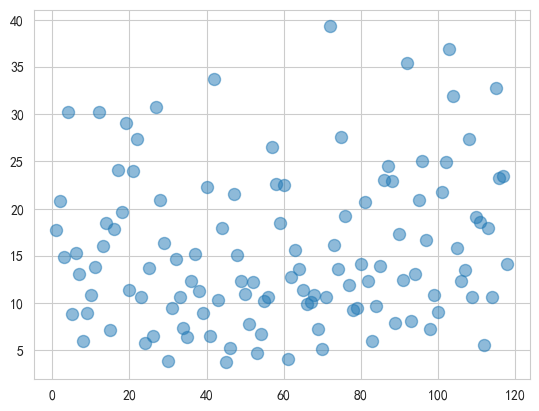

In [28]:
plt.scatter(x=df['No'], y=df['Zn'], s=75, alpha=.5)

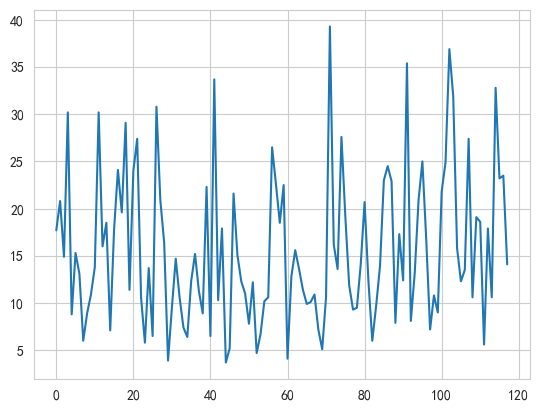

In [33]:
plt.plot(df['Zn'])

{'whiskers': [<matplotlib.lines.Line2D at 0x246a5b8a110>,
 'caps': [<matplotlib.lines.Line2D at 0x246a5b8a7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a5b89cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x246a5b8ae30>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a5b8b190>],
 'means': []}

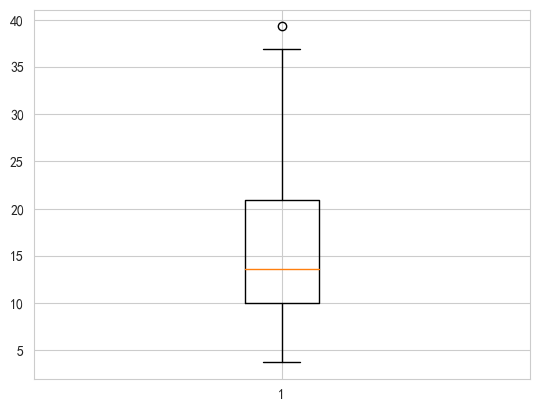

In [29]:
plt.boxplot(df['Zn'])

C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_38444\2730794453.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Zn'],shade = True)
C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_38444\2730794453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Zn'],kde = False,fit = stats.gamma)


<AxesSubplot: xlabel='Zn', ylabel='Density'>

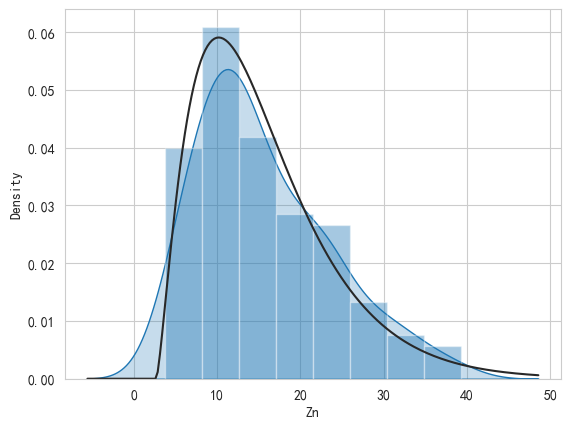

In [14]:
sns.kdeplot(df['Zn'],shade = True)
sns.distplot(df['Zn'],kde = False,fit = stats.gamma)
# 关闭直方图，开启rug 细条
# sns.distplot(df['Zn'],hist = False,rug = True)

<AxesSubplot: >

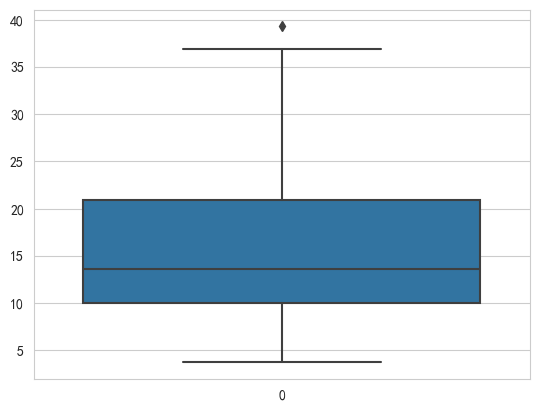

In [34]:
sns.boxplot(df['Zn'])

# 拓展练习

In [37]:
df1 = pd.read_excel(r'.\data\practice1.xlsx',sheet_name='earthquakes',header=0)
df1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-22T12:47:50.911Z,-9.962500,160.0044,12.388,4.90,mb,32.0,136.0,0.5230,0.85,...,2022-11-22T13:12:12.040Z,"43 km SE of Malango, Solomon Islands",earthquake,9.82,5.166,0.102,41.0,reviewed,us,us
1,2022-11-22T12:40:34.694Z,36.199100,14.1665,10.000,4.60,mb,32.0,77.0,2.4770,0.72,...,2022-11-22T14:31:15.748Z,"15 km NNW of ?ebbu?, Malta",earthquake,6.71,1.790,0.133,23.0,reviewed,us,us
2,2022-11-22T12:12:49.538Z,-9.826900,159.5773,10.000,5.20,mb,41.0,100.0,0.5310,0.87,...,2022-11-22T13:02:39.103Z,Solomon Islands,earthquake,5.81,1.662,0.054,112.0,reviewed,us,us
3,2022-11-22T12:04:53.910Z,41.509833,-112.1785,7.200,2.81,ml,41.0,66.0,0.0968,0.18,...,2022-11-22T14:40:59.379Z,"7 km SW of Corinne, Utah",earthquake,0.27,0.540,0.151,20.0,reviewed,uu,uu
4,2022-11-22T12:03:51.136Z,-31.078100,-179.0014,10.000,5.20,mb,36.0,75.0,2.0380,0.93,...,2022-11-22T12:39:21.040Z,Kermadec Islands region,earthquake,6.51,1.781,0.077,56.0,reviewed,us,us


In [39]:
#把时间字符串转为索引
df1['time_index']=pd.to_datetime(df1['time'])
df1.set_index('time_index',inplace=True)
df1

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time_index,,,,,,,,,,,,,,,,,,,,,
2022-11-22 12:47:50.911000+00:00,2022-11-22T12:47:50.911Z,-9.962500,160.0044,12.388,4.90,mb,32.0,136.0,0.52300,0.85,...,2022-11-22T13:12:12.040Z,"43 km SE of Malango, Solomon Islands",earthquake,9.82,5.166,0.102,41.0,reviewed,us,us
2022-11-22 12:40:34.694000+00:00,2022-11-22T12:40:34.694Z,36.199100,14.1665,10.000,4.60,mb,32.0,77.0,2.47700,0.72,...,2022-11-22T14:31:15.748Z,"15 km NNW of ?ebbu?, Malta",earthquake,6.71,1.790,0.133,23.0,reviewed,us,us
2022-11-22 12:12:49.538000+00:00,2022-11-22T12:12:49.538Z,-9.826900,159.5773,10.000,5.20,mb,41.0,100.0,0.53100,0.87,...,2022-11-22T13:02:39.103Z,Solomon Islands,earthquake,5.81,1.662,0.054,112.0,reviewed,us,us
2022-11-22 12:04:53.910000+00:00,2022-11-22T12:04:53.910Z,41.509833,-112.1785,7.200,2.81,ml,41.0,66.0,0.09680,0.18,...,2022-11-22T14:40:59.379Z,"7 km SW of Corinne, Utah",earthquake,0.27,0.540,0.151,20.0,reviewed,uu,uu
2022-11-22 12:03:51.136000+00:00,2022-11-22T12:03:51.136Z,-31.078100,-179.0014,10.000,5.20,mb,36.0,75.0,2.03800,0.93,...,2022-11-22T12:39:21.040Z,Kermadec Islands region,earthquake,6.51,1.781,0.077,56.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23 15:14:11.820000+00:00,2022-10-23T15:14:11.820Z,37.121500,-121.5215,6.310,2.65,md,90.0,30.0,0.06295,0.11,...,2022-10-25T19:29:17.343Z,"9km ENE of San Martin, CA",earthquake,0.11,0.320,0.167,136.0,reviewed,nc,nc
2022-10-23 15:13:42.587000+00:00,2022-10-23T15:13:42.587Z,37.708500,77.9462,10.000,4.40,mb,35.0,78.0,3.79300,0.39,...,2022-10-27T19:45:53.040Z,"86 km WNW of Zangguy, China",earthquake,4.41,1.868,0.138,18.0,reviewed,us,us
2022-10-23 15:10:11.240000+00:00,2022-10-23T15:10:11.240Z,-3.997000,141.8762,119.544,4.20,mb,17.0,107.0,1.88100,0.41,...,2022-10-27T19:30:13.040Z,"107 km WNW of Ambunti, Papua New Guinea",earthquake,9.53,8.340,0.160,11.0,reviewed,us,us


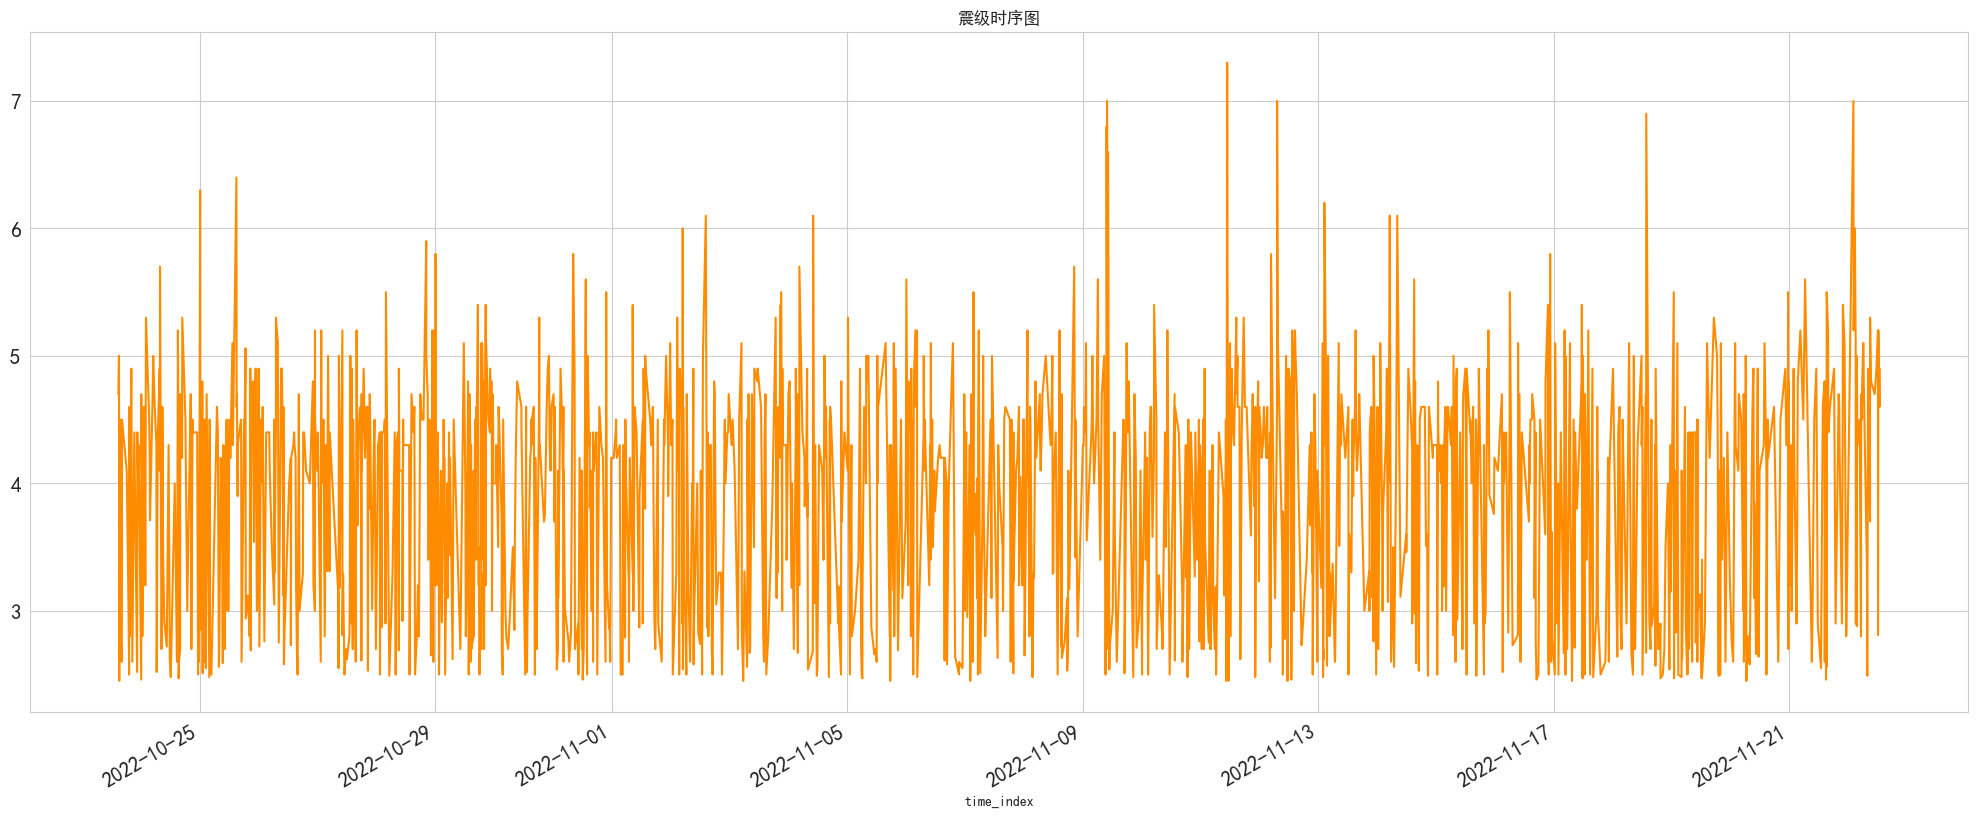

In [41]:
plot=df1['mag'].plot(figsize=(25,10),title="震级时序图",color='darkorange', grid=True,fontsize=15)
fig=plot.get_figure()
fig.savefig("./data/mag.png")
plt.show()

In [42]:
df1.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1639.000000,1639.000000,1639.00000,1639.000000,1469.000000,1469.000000,1391.000000,1639.000000,1452.000000,1639.000000,1457.000000,1463.000000
mean,18.724088,-35.657100,69.03495,3.885240,42.758339,118.369381,2.588419,0.525658,6.167743,4.035154,0.152389,37.870130
std,29.552246,123.441318,127.47022,0.917822,36.764913,67.067743,3.947198,0.277638,4.314161,4.442483,0.290339,58.761868
min,-64.241300,-179.962600,-3.23000,2.450000,3.000000,13.000000,0.000000,0.020000,0.080000,0.000000,0.000000,1.000000
25%,-6.117950,-150.788450,10.00000,2.940000,19.000000,67.000000,0.452000,0.300000,1.935290,1.000000,0.076000,10.000000
50%,19.332833,-70.494500,16.60000,4.200000,31.000000,103.000000,1.411000,0.530000,6.490000,1.957000,0.114000,19.000000
75%,41.414700,114.311950,61.15000,4.500000,53.000000,154.000000,3.045500,0.710000,9.302500,6.309000,0.165530,40.000000
max,85.808800,179.942900,665.26700,7.300000,467.000000,351.000000,39.051000,1.560000,23.550000,31.610000,3.930000,723.000000
